# Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Dataset Read-In

In [2]:
df = pd.read_csv('../../DATA/filled_toxicity_df.csv')

df.head()

,mol_id,MolecularWeight,LogP,TPSA,HBDonors,HBAcceptors,RotatableBonds,FractionCSP3,HeavyAtoms,RingCount,...,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
0,TOX3021,258.324,1.34240,82.28,1.0,5.0,3.0,0.222222,16.0,2.0,...,1,0,0,0,0,1,0,0,0,0
1,TOX3020,204.229,1.29940,49.41,1.0,2.0,2.0,0.272727,15.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,TOX3024,288.475,5.09030,20.23,1.0,1.0,1.0,0.900000,21.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3,TOX3027,276.424,3.75244,32.34,1.0,2.0,7.0,0.588235,20.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,TOX20800,206.027,-0.99220,135.29,5.0,3.0,2.0,1.000000,11.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.set_index('mol_id', inplace=True)

df.head()

,MolecularWeight,LogP,TPSA,HBDonors,HBAcceptors,RotatableBonds,FractionCSP3,HeavyAtoms,RingCount,AromaticProportion,...,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
mol_id,,,,,,,,,,,,,,,,,,,,,
TOX3021,258.324,1.34240,82.28,1.0,5.0,3.0,0.222222,16.0,2.0,0.5625,...,1,0,0,0,0,1,0,0,0,0
TOX3020,204.229,1.29940,49.41,1.0,2.0,2.0,0.272727,15.0,2.0,0.4000,...,0,0,0,0,0,0,0,0,0,0
TOX3024,288.475,5.09030,20.23,1.0,1.0,1.0,0.900000,21.0,4.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
TOX3027,276.424,3.75244,32.34,1.0,2.0,7.0,0.588235,20.0,1.0,0.3000,...,0,0,0,0,0,0,0,0,0,0
TOX20800,206.027,-0.99220,135.29,5.0,3.0,2.0,1.000000,11.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['MolecularWeight', 'LogP', 'TPSA', 'HBDonors', 'HBAcceptors',
       'RotatableBonds', 'FractionCSP3', 'HeavyAtoms', 'RingCount',
       'AromaticProportion', 'LogS_ESOL', 'PositiveCharges', 'NegativeCharges',
       'FormalCharge', 'AromaticRings', 'AromaticHeterocycles',
       'AliphaticRings', 'MolecularComplexity', 'MolarRefractivity',
       'Heteroatoms', 'HalogenCount', 'PhenolicGroups', 'NR-AR', 'NR-AR-LBD',
       'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma',
       'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53'],
      dtype='object')

In [5]:
subset_0 = df[df['NR-AhR'] == 0].sample(n=845, random_state=42)

subset_1 = df[df['NR-AhR'] == 1]

balanced_df = pd.concat([subset_0, subset_1])

features_df = balanced_df[['MolecularWeight', 'LogP', 'TPSA', 'HBDonors', 'HBAcceptors',
       'RotatableBonds', 'FractionCSP3', 'HeavyAtoms', 'RingCount', 'LogS_ESOL',
       'FormalCharge', 'AromaticRings', 'AromaticHeterocycles',
       'AliphaticRings', 'MolecularComplexity', 'MolarRefractivity']]

target_df = balanced_df[['NR-AhR']]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.33, random_state=42)

In [7]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV

smote_enn = SMOTEENN(random_state=42)

pipeline = Pipeline([
    ('smote_enn', smote_enn),
    ('clf', OneVsRestClassifier(LogisticRegression(class_weight='balanced', max_iter=10000)))
])

param_grid = {
    'clf__estimator__C': [0.1, 1, 10],
    'clf__estimator__solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1_macro',   
    cv=5,
    n_jobs=1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END clf__estimator__C=0.1, clf__estimator__solver=liblinear; total time=   0.0s
[CV] END clf__estimator__C=0.1, clf__estimator__solver=liblinear; total time=   0.0s
[CV] END clf__estimator__C=0.1, clf__estimator__solver=liblinear; total time=   0.0s
[CV] END clf__estimator__C=0.1, clf__estimator__solver=liblinear; total time=   0.0s
[CV] END clf__estimator__C=0.1, clf__estimator__solver=liblinear; total time=   0.0s
[CV] END clf__estimator__C=0.1, clf__estimator__solver=lbfgs; total time=   0.0s
[CV] END clf__estimator__C=0.1, clf__estimator__solver=lbfgs; total time=   0.0s
[CV] END clf__estimator__C=0.1, clf__estimator__solver=lbfgs; total time=   0.0s
[CV] END clf__estimator__C=0.1, clf__estimator__solver=lbfgs; total time=   0.0s
[CV] END clf__estimator__C=0.1, clf__estimator__solver=lbfgs; total time=   0.0s
[CV] END clf__estimator__C=1, clf__estimator__solver=liblinear; total time=   0.0s
[CV] END clf__estimator__C=

In [8]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       283
           1       0.72      0.75      0.73       275

    accuracy                           0.73       558
   macro avg       0.73      0.73      0.73       558
weighted avg       0.73      0.73      0.73       558



In [9]:
from sklearn.metrics import roc_auc_score

y_proba = grid_search.predict_proba(X_test)[:, 1]  
print("AUC-ROC:", roc_auc_score(y_test, y_proba))

AUC-ROC: 0.7996016704143913


## SHAP Interpretability

In [10]:
best_model = grid_search.best_estimator_

In [11]:
ovr_model = best_model.named_steps['clf']

In [12]:
import shap

X_test_sample = shap.utils.sample(X_test, 50, random_state=42)  # SHAP is slow, use a subset
X_train_sample = shap.utils.sample(X_train, 50, random_state=42)

In [13]:
scaler = best_model.named_steps.get('scaler', None)
ovr_model = best_model.named_steps['clf']

In [14]:
X_test_input = X_test_sample
X_train_input = X_train_sample

In [15]:
masker = shap.maskers.Independent(X_train_input)


🔍 SHAP for Class 0 (LogisticRegression)


The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


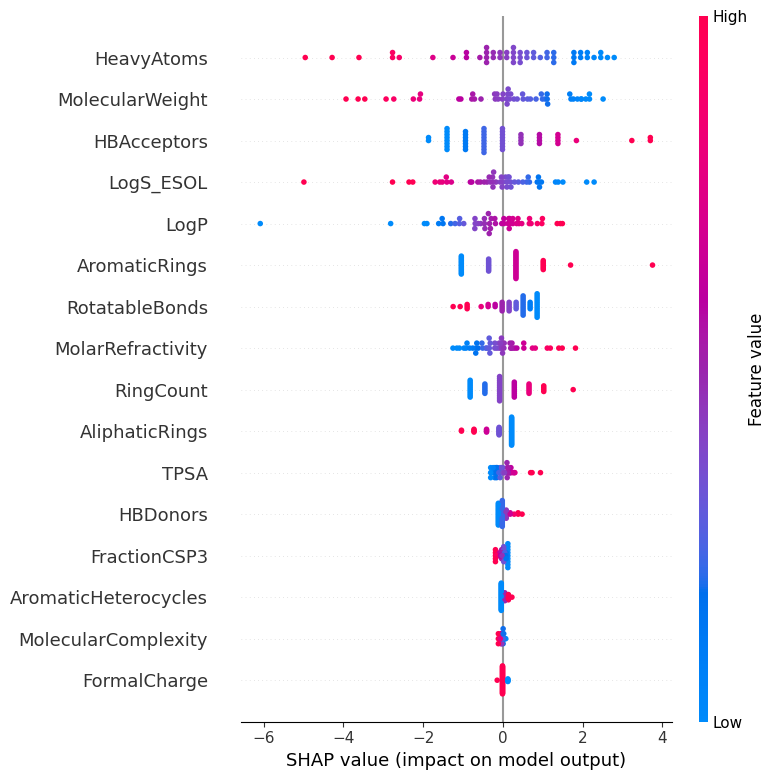

In [16]:
for i, estimator in enumerate(ovr_model.estimators_):
    print(f"\n🔍 SHAP for Class {i} (LogisticRegression)")

    explainer = shap.LinearExplainer(estimator, X_train_input, feature_perturbation="interventional")
    shap_values = explainer(X_test_input)

    shap.summary_plot(shap_values, X_test_input, feature_names=X_test.columns, show=True)

## Saving the Model as a .pkl File

In [21]:
import pickle
import os

os.makedirs('../../Models/NR-AhR/', exist_ok=True)

with open('../../Models/NR-AhR/rs_smoteen_ovr.pkl', 'wb') as file:
    pickle.dump(best_model, file)